<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 11 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 23 March 2020</div>

# Introduction to Graph Theory with NumPy and SciPy

`NumPy` is for performance. `SciPy` contains all classic (non-probabilistic, which implies machine-learning) scientific algorithms.

Today we apply linear algebra to **ecology** with **graphs**.

<br />
<center>
<img src="ipynb.images/ecology.jpg" width=600 />
</center>

<div style="text-align: right; color: gray">10</div>

## Review

**Matrices** represent **rigid transformations** (maps) in vector space, mapping one **state vector** to another state vector.

In [1]:
import numpy as np

theta = np.deg2rad(45)
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta),  np.cos(theta), 0],
              [            0,              0, 1]])

print("R times the x-axis:", R @ [1, 0, 0])
print("R times the y-axis:", R @ [0, 1, 0])
print("R times a 45 degree vector:", R @ [1, 1, 0])

R times the x-axis: [0.70710678 0.70710678 0.        ]
R times the y-axis: [-0.70710678  0.70710678  0.        ]
R times a 45 degree vector: [0.         1.41421356 0.        ]


Since multiplying a vector by $R$ rotates it 45 degrees, multiplying the result
by $R$ again should result in the original vector being rotated 90 degrees.
Matrix multiplication is associative, which means that $R(Rv) = (RR)v$, so
$S = RR$ should rotate vectors by 90 degrees around the z-axis. Let's check.

In [2]:
S = R @ R
S @ [1, 0, 0]

array([0., 1., 0.])

In [3]:
print("R @ z-axis:", R @ [0, 0, 1])

R @ z-axis: [0. 0. 1.]


R rotates both the x and y axes, but not the z-axis.

What does that make the z-axis? If you thought that's an **eigenvector** of R, that is the *right answer*! What is its eigenvalue?

See, if you're a mountain climber, linear algebra and eigenvectors come naturally to you.

If you've never climbed a mountain and linear algebra remains a little bit of challenge, you could pick up an introductory linear algebra textbook, e.g. Gil Strang's [Linear Algebra](http://math.mit.edu/~gs/linearalgebra/) and its Applications. It's free. 

</br >
<center>
<img src="ipynb.images/wink.jpg" width=100 />
</center>


<div style="text-align: right; color: gray">11</div>

# Graphs

So, why did we do all this linear algebra? 

Because linear algebra is the foundational technique for climbing **mountains of data**, and that is what Google did when it conquered the **World-Wide Web**. [Sergei Brin](https://en.wikipedia.org/wiki/Sergey_Brin) and [Larry Page](https://en.wikipedia.org/wiki/Larry_Page) asked themselves, how do we climb that big mountain? The found out about linear algebra and applied it to the Web. And i'll show you how they did it.

By the way, this is how [Alex Honnold](https://en.wikipedia.org/wiki/Alex_Honnold) scaled El Capitan in Yosemite National Park in California in 2018. He reached the top of the route without the aid of ropes or safety gear. Read about it [here](https://www.nationalgeographic.com/adventure/features/adventurers-of-the-year/2018/alex-honnold-rock-climber/). Or watch the [movie](https://www.nationalgeographic.com/films/free-solo/) on Netflix.

<br />
<center>
<img src="ipynb.images/elcapitan2.jpg" width=600 />
</center>

<br />
<center>
<img src="ipynb.images/alexhonnold.jpg" width=600 />
</center>

Best way to track a mountain climber is to draw the path the climber takes to climb the mountain. So we essentialy draw a network of **nodes** (positions), and then join them with **edges**. So we draw a **graph**.

<br />
<center>
<img src="ipynb.images/elcapitan.jpg" width=600 />
</center>

</br >
Yes, this is a graph, too. But you might not want to climb this one. It would take a long time, would give you a headache, and you would probably get lost many times over.

<br />
<center>
<img src="ipynb.images/biggraph.jpg" width=400 />
</center>

But you know what? Your brain is also a **graph**. And Artificial Neural Networks (ANN) are also graphs. So, in order to do Machine Learning (ML), you need to know about graphs, which means you need to know how to **move** from one graph **node** to another. That is essentially a **mountain move**. So you need to learn **linear algebra**!

<div style="text-align: right; color: gray">12</div>

## Adjacency Matrix
Let's take a look at the **PageRank algorithm**, the algorithm that made Google famous. Its origins are actually in **article citation**. [Here](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0134794) are some examples, and [here](https://pdfs.semanticscholar.org/f33f/cdd5a0a5fd8b29e81748463836cad07d5e8c.pdf) too.

Let's play a game.

Suppose you have a graph linking $n$ x $n$ possible positions, and if you can move from one position $i$ to another position $j$, then you enter a 1 in the matrix cell $(i,j)$ and $(j, i)$. 0 otherwise. That matrix is called the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) of the graph.

Say you want to analyze the relationships between libraries listed on the [Python Package Index](https://pypi.org/), or PyPI, which contains over **one hundred thousand packages**. Holding an adjacancy matrix for this graph, assuming 8-byte labels, would take 
up $8 \left(100 \times 10^3\right)^2 = 8 \times 10^{10}$ bytes, or 80GB,
of RAM. Do you have that much RAM on your computer? Bet you don't.

How about [github](https://github.com/)?

You might also want to analyze the Association for Computing
Machinery (ACM) citation graph, a [network](https://dl.acm.org/) of over *two million scholarly works
and references*. *That* adjacency matrix, for 8-byte labels, would take up 32 terabytes of RAM.

## Transition Matrix

That is the matrix that gives us possible moves, from one position to another. If we have a Markov chain of a game, then that matrix is **stochastic** and the results are viewed in a *probabilistic perspective*. 

## Sparse Matrix
We know that the dependency and reference graphs are *sparse*:
packages usually depend on just a few other packages, not on the whole of PyPI.
And papers and books usually only reference a few others, too. So the vast majority of the adjacency matrixes for the graphs referenced above are made up of **zeros**. So we can hold these adjacency matrices using the sparse data structures from `scipy.sparse`, and use the linear algebra functions in `scipy.sparse.linalg` to compute the values we need. 

More than anything else, [**sparse**](https://en.wikipedia.org/wiki/Sparse_matrix) matrix representations is *the* **tool** that allows you to handle computations like the ones mentionned above.

</br >
<center>
<img src="ipynb.images/tools.jpg" width=400 />
</center>

Note however that there *are* things we cannot do, even with sparse matrices. For example, the inverse of a sparse matrix is, in general, *not sparse*. Similarly, you can't get all the eigenvectors of a gigantic sparse matrix (even though you *can* express and view a gigantic sparse matrix), because eigenvectors would together make up a **dense** matrix.

But still, we can do a lot of funky things. And funky is what Google did.

<div style="text-align: right; color: gray">13</div>

## PageRank as a Markov Chain

Ok, so by now we know that linear algebra is all about **vectors** (ordered collections of numbers) and their transformations by multiplying them with **matrices** (collections of vectors, which rigidly rotate vectors in vector space, or represent state transition transformations if the matrix is stochastic). 

Vectors and matrices are to linear algebra what counting is to probabilities and statistics, and the **eigendecomposition theorem** is linear algebra's analog to Bayes' thorem in probabilities and statistics.

We also know how to think of vectors and vector rotations: **climbing a mountain** in n dimensions.

We also know about **Markov chains**: memoryless state machines with interesting steady-state properties, like the game of chess or Go. That's when we can't move wherever we want on the mountain; only from ***one*** specific position to ***another*** specific position. And if there's randomness involved, which you should be comfortable with by now since we learned all about probabilities and statistics (you should be comfortable with fractional values in a matrix instead of 0s and 1s -stochastic matrixes). Which means, for example, half of the times you move **there**, the other half, **over there instead**. 

There is a theorem called the **fixed point theorem** for continuous transformations (stems from the
[Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem)),
which states that a stochastic matrix has **1** as its ***largest*** eigenvalue, and that its associated eigenvector, called **dominant**, represents the `long-term steady-state` of the associated state machine: Where you'll end up after millions of state transitions. The dominant eigenvector unlocks the ***long-term*** (steady-state) behavior of Markov Chains. 

The dominant eigenvector also yields the results of Google queries!

</br >
<center>
<img src="ipynb.images/whaat.jpg" width=200 />
</center>

- A Google search is nothing more than a search for the dominant eigenvector of your search pattern query on the graph made up by the World Wide Web, which links documents to documents. If you can write down the adjacency matrix of the WWW, a 1 in cell $(i, j)$ where $i$ represents http://a.b.c.d and $j$ represents http://e.f.g.h means that http://a.b.c.d has a link to http://e.f.g.h. Does this work the other way around, too? If not, we say that the graph is **directional**. 

Today we'll explore this concept a bit more, and by doing so practice linear algebra and learn some python tools that simplify working with Big Data.

## Some Graph Concepts


</br >
<center>
<img src="ipynb.images/pagerank.png" width=400 />
</center>

Let's picture a graph, $G$,
as an *adjacency matrix*, in which we number the nodes of the graph from $0$
to $n-1$, and place a 1 in row $i$, column $j$ of the matrix whenever there is
an edge from node $i$ to node $j$. In other words, if we call the adjacency
matrix $A$, then $A_{i, j} = 1$ if and only if the edge $(i, j)$ is in $G$. We
can then use linear algebra techniques to study this matrix.

The *degree* of a node is defined as the number of edges touching it.  For
example, if a node is connected to five other nodes in a graph, its degree
is 5. In matrix terms, the degree corresponds to the *sum*
of the values in a row or column of the adjacency matrix.

In case of *directed* graphs (graph edges have a preferred direction, like hyperlinks in the WWW), number of edges going into a node (as hyperlinks, for example) is known as *in-degree* of the corresponding node, while number of edges coming out of a node is known as *outdegree* of the corresponding node.

#### Exercise: Write the adjacency matrix of the following graph, and find the in and out degrees of each node:

Write the adjacency matrix and the in and out degrees as numpy arrays.

</br >
<center>
<img src="ipynb.images/graphexample.png" width=400 />
</center>

It's easier to understand Google's *PageRank* if we start with simple lab. 

In [ ]:
import numpy as np
T = np.array([[0, 1, 0, 0, 0, 0, 0, 0],[],[],[],[],[],[]])

in_degrees = np.array([1, 2, 3, ...])
out_degrees = np.array([1, 0, 0, ...])

<div style="text-align: right; color: gray">14</div>

## Food Webs: Who eats whom

</br>
<center>
<img src="ipynb.images/foodwebs.jpg" width=400 />
    yummy yummy..
</center>

To rank Web pages by importance, you count
how many other Web pages link to it. That is the basic logic of the **PageRank** algorithm, which inherits from scientific article citation research.  

The key insight that drove Google's early success was that important Web pages
are not linked to by just many Web pages, but by *important*
Web pages. And how do we know that those other pages are important? Because
they themselves are linked to by important pages. And so on. This is a **recursive definition**.

To build a stochastoc *transition matrix* that contains the probabilities of surfing from one Web page to another, for all pages in the Word Wide Web, would be a daunting task. In fact, even just the **adjacency matrix** (what you did above) would be a daunting task because of the huge size of the WWW graph. And yet, that is exactly what Google did.

Transition matrix probabilities depend on the hyperlinks contained in each Web page. Thus the transition matrix is a function of the *adjacency matrix* of the WWW graph.

### Gedankenexperiment

Imagine that the WWW is like the network of roads built by the ancient Romans (in the early days of the WWW, it was exactly like Roman chariot highways, as all WWW nodes eventually linked to central nodes at the University of Illinois in Urbana-Champaign - your instructor remembers these days). If you're a charioteer lost on roman highways, chances are pretty good you'll eventually end up in Rome, right?

</br >
<center>
<img src="ipynb.images/chariot.png" width=300 />
</center>

Well, if you're the silver surfer from the Fantastic Four [movie](https://en.wikipedia.org/wiki/Fantastic_Four:_Rise_of_the_Silver_Surfer), and Google has hired you to surf the Web at the speed of light, what sites will you tend to visit *a lot more than others*?

</br >
<center>
<img src="ipynb.images/silversurfer.png" width=200 />
</center>

The ones that most hyperlinks point to the most, right? And if you only surf the Web pages relevant to a particular Google word query, then listing these and returning them would be the result of the Google search engine, right?

### drum-roll
The search for $\boldsymbol{r}$, Google's search engine results, is nothing more than the search for the dominant eigenvector of the WWW's transition matrix, listed in descending order (the node with the highest component of the eigenvector is the top search result). 
- That's not actually *entirely* correct. The situation is a bit more complicated because a user can also surf to any URL by using the URL bar, similarly to how we draw cards in Monopoly to jump from one board square to another very far away. We have to wait until we write down the silver surfer formula to see that the exact equation looks like. But for now we can assume there is no URL bar :-)

Google initially carried out this computation for the WWW graph on another graph of hundreds of computers, in a distributed fashion, using a mapreduce-style algorithm.

We don't have as much computing power as google in our laptops and our notebooks, but we can probably analyze smaller networks in the same way that Google analyzed the WWW. We'll use an example by Stefano Allesina and Mercedes Pascual,
which they [published](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000494i)
in PLoS Computational Biology. They applied the method to ecological *food webs*, networks that link species to those species they eat.

Naively, if you wanted to see how critical a species was for an ecosystem, you
would look at how many species ***eat it***. If it's many, and that species
disappeared, then all its "dependent" species might disappear with it! In
network parlance, you could say that its **in-degree** determines its **ecological
importance**.

Here is a food Web from the St Marks National Wildlife Refuge in
Florida, in Graph Markup Language format. The web was [described](http://www.sciencedirect.com/science/article/pii/S0304380099000228)
in 1999 by Robert R. Christian and Joseph J. Luczovich. In the dataset, a
node $i$ has an edge to node $j$ if species $i$ eats species $j$.

Let's load the data, leveraging `networkx`, a Python [package](https://networkx.github.io/) for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks (pretty cool). Click [here](https://networkx.github.io/documentation/networkx-0.37/) for its API.

```(python)
pip install networkx
```

Let's also load the data for the experiment, in the Graph Modeling Language (GML) format, a hierarchical ASCII-based file [format](https://en.wikipedia.org/wiki/Graph_Modelling_Language) for describing graphs.

In [1]:
import networkx as nx
stmarks = nx.read_gml('data/stmarks.gml')

In [2]:
import matplotlib as pl
nx.draw(stmarks,pos=nx.spring_layout(stmarks))

C:\Users\liaoz\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\liaoz\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{'fish-eating birds': Text(0.03869675190879012, -0.1420500650815595, 'fish-eating birds'),
 'atlantic silverside and bay anchovies': Text(-0.11250683181732177, 0.0014959722659358173, 'atlantic silverside and bay anchovies'),
 'macro-epiphytes': Text(0.5824383760590396, 1.0, 'macro-epiphytes'),
 'spot': Text(-0.013848762631859808, -0.16563466367128102, 'spot'),
 'brittle stars': Text(0.016846199225993768, -0.43224360811171486, 'brittle stars'),
 'catfish and stingrays': Text(-0.26411883751870263, -0.14717223305572927, 'catfish and stingrays'),
 'predatory polychaetes': Text(-0.02009507559037111, 0.006627469898492597, 'predatory polychaetes'),
 'pinfish': Text(-0.051514329047013405, -0.22710389566002454, 'pinfish'),
 'killifish': Text(0.046512941293590127, 0.059216908561473484, 'killifish'),
 'herbivorous ducks': Text(-0.012868656581992804, 0.25418551173584797, 'herbivorous ducks'),
 'other gastropods': Text(0.733784811565573, 0.6747160146622995, 'other gastropods'),
 'predatory gastropo

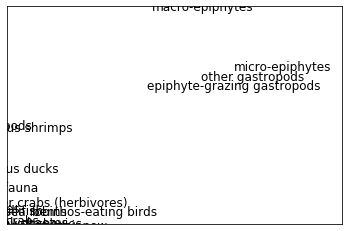

In [3]:
nx.draw_networkx_labels(stmarks,pos=nx.spring_layout(stmarks))

Let's get the adjacency matrix for that graph, in sparse matrix representation. We will use SciPy's `sparse` package for that.  Because a matrix only holds numerical information, we need to maintain a separate list of names corresponding to the graph nodes.

In [4]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
species = np.array(list(stmarks.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(stmarks, dtype=np.float64)

In [5]:
Adj

<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Row format>

In [6]:
species

array(['fish-eating birds', 'atlantic silverside and bay anchovies',
       'macro-epiphytes', 'spot', 'brittle stars',
       'catfish and stingrays', 'predatory polychaetes', 'pinfish',
       'killifish', 'herbivorous ducks', 'other gastropods',
       'predatory gastropods', 'deposit-feeding polychaetes', 'raptors',
       'Halodule wrightii', 'gulls', 'epiphyte-grazing gastropods',
       'detritus', 'deposit-feeding peracaridan crustaceans',
       'blue crabs', 'pipefish and seahorses',
       'epiphyte-grazing amphipods', 'bacterioplankton',
       'fish and crustacean-eating birds',
       'suspension-feeding polychaetes', 'sheepshead minnow',
       'phytoplankton', 'zooplankton', 'suspension-feeding molluscs',
       'red drum', 'predatory shrimps', 'benthic algae',
       'benthic bacteria', 'tonguefish', 'hermit crabs',
       'southern hake and sea robins', 'benthos-eating birds',
       'herbivorous shrimps', 'omnivorous crabs', 'meiofauna',
       'microfauna', 'micropr

In [7]:
import pandas as pd
pd.DataFrame(species[:20]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,fish-eating birds,atlantic silverside and bay anchovies,macro-epiphytes,spot,brittle stars,catfish and stingrays,predatory polychaetes,pinfish,killifish,herbivorous ducks,other gastropods,predatory gastropods,deposit-feeding polychaetes,raptors,Halodule wrightii,gulls,epiphyte-grazing gastropods,detritus,deposit-feeding peracaridan crustaceans,blue crabs


From the adjacency matrix, we will derive a transition probability matrix, where:

- Every 1-edge is replaced by a probability of 1 over the number of outgoing edges from that species. In the food web, it might make more sense to call this a *lunch probability matrix*

</br >
<center>
<img src="ipynb.images/shark.png" width=300 />
</center>

For example, if shrimp is eaten by whales, sharks, tilapia, and humans, then the shrimp-row of the transition matrix for the ***eaten by*** transformation contains $1/4$ for the columns whale, shark, tilapia, human, zeros everywhere else.

The total number of species in our matrix is going to be used a lot, so let's call it $n$:

In [8]:
n = len(species)
print(n)
Adj

48


<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Row format>

To reveal `Adj`, do:

In [9]:
Adj.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

To make it look pretty, pandas to the rescue!

In [10]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Next, we need the degrees, and, in particular, the diagonal matrix containing the inverse of the out-degrees of each node on the diagonal. Note that numpy's [ravel](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ravel.html) usually returns a view into the existing array (sometimes it returns a copy). [flatten](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.flatten.html) returns a new array.

Also note, there are several sparse matrix classes in `scipy`. If you want to process big data, these representations are your friends. 

* bsr_matrix(arg1[, shape, dtype, copy, blocksize]) Block Sparse Row matrix
* coo_matrix(arg1[, shape, dtype, copy]) A sparse matrix in COOrdinate format.
* csc_matrix(arg1[, shape, dtype, copy]) Compressed Sparse Column matrix
* csr_matrix(arg1[, shape, dtype, copy]) Compressed Sparse Row matrix
* dia_matrix(arg1[, shape, dtype, copy]) Sparse matrix with Diagonal storage
* dok_matrix(arg1[, shape, dtype, copy]) Dictionary Of Keys based sparse matrix.
* lil_matrix(arg1[, shape, dtype, copy]) Row-based linked list sparse matrix

Since we divide by a lot of numbers, some of which can be zero, we use a numpy capability, which ***can be very dangerous***, but also useful sometimes: `np.seterr(divide='ignore')`.

In just two lines of python, we obtain degrees, and build a diagonal matrix with each $(i,i)$ node containing the inverse of the out-degree for that node:

In [11]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

In [12]:
Deginv

<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Compressed Sparse Row format>

Since adjacency matrices are often sparse, and filled with only ones, plotting them cam be quite informative. Let's write a matrix plotting function.

In [13]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

Let's plot the diagonal matrix made of the inverse of the out-degrees of each node, and the food Web matrix, too.

C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

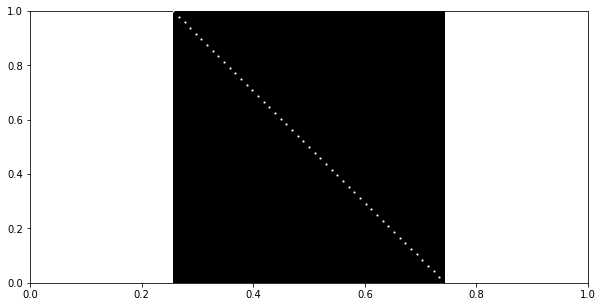

In [14]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

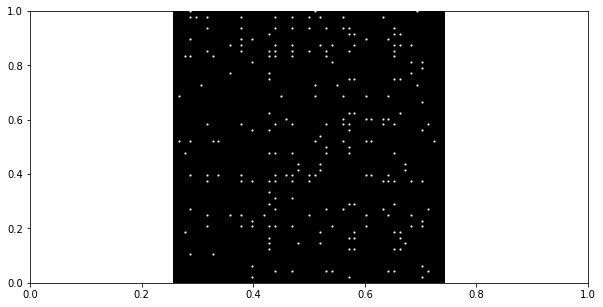

In [15]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

And for ascii style, with out-degrees on the right margin:

In [16]:
dense = Adj.todense()
#for x in np.nditer(dense, order='K'):
#    print (int(x)),

#for row in dense[0]:
#    numbers =[ np.vectorize(np.int)(x) for x in row ]
#''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '')

# ok this was way too tough!
for i in range(48):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[000100000000000000000000010000000000000000010000]] 3
[[000110100000100000100100101000100000010000000000]] 10
[[000000000000000000000000000000000000000000000000]] 0
[[000000100000100000100100100100110000000100000000]] 9
[[000000000000000001000000000000011000000110000000]] 5
[[000100000000101000000000000000000010001000000000]] 5
[[000000000010100000100100001010001000000110100000]] 10
[[000000100000100001100100100100010000000100000000]] 9
[[001100010000000001100100000100000000000100000000]] 8
[[000000000000001000000000000010000000000000101000]] 4
[[000000000000000000000000000000000000000000001000]] 1
[[000000000010000001000000000000000000000000100000]] 3
[[000000000000000001000000000000011000000110000000]] 5
[[000001000000000000000000010001000000000000010000]] 4
[[000000000000000000000000000000000000000000000000]] 0
[[010000000000000000010000010000100010001000000000]] 6
[[000000000000000000000000000000000000000000001000]] 1
[[000000000000000000000000000000000000000000000000]] 0
[[000000

Wow! This looks like ascii-art, doesn't it?

## Homework

Assume the ascii-art of your beautiful face is a graph adjacency matrix.

Assume the various values you had for the ascii-art pixels of your beautiful face represent the **weight** of the connection between two nodes. 

Use networkX to draw the graph of your face. Get rid of any background. I just want your face.


## Back to our class..

And now compute the transition matrix in the way below, because mutliplying a matrix by a diagonal matrix of factors will mutliply each entry in the matrix by its associated factor, which is the probability of geating eaten.

In [17]:
Trans = (Deginv @ Adj).T
Trans

<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Column format>

Let's verify by examining the first row:

In [18]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.33333333, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        ]])

fish-eating birds have three predators.

### Search for the Dominant Eigenvector

If the Google search engine unleashes the silver surfer on our Food Web network, and since he surfs at the speed of light, he totally finds the most linked pages, the way Romans on chariots end up in Rome. 

We cannot surf at the speed of light, unfortunately, but Prof. Dino told us about the **dominant eigenvector**, so we know all we need to do is find the eigenvector associated with the eigenvalue = 1, for the graph transition matrix (don't confuse *transtion matrix* with *adjacency matrix*).

And the dominant eigenvector's components will give us the PageRank score of each node! All we need to do is to rearrange the vector's components with the highest component first, 2nd highest 2nd, etc, and then return that sorted eigenvector to the user. ***That is what Google does with your search queries***! 

If we call the transition matrix $M$ and the vector of PageRank values (dominant eigenvector) $r$, we have:

$$
\boldsymbol{r} = M\boldsymbol{r}
$$

In other words, Google's search engine returns the **fixed point** of the network graph restricted to your particular query.

But.. for the silver surfer to be able to search every page, *every* page must be reachable
from every other page. Our food web is problematic (we say *degenerate* in linear algbra): The bottom of the food chain,
what the authors call *detritus* (basically *sea sludge*), doesn't actually *eat*
anything, so you *can't reach other species from it*. When the silver surfer arrives at that node, ***he is stuck***!

</br >
<center>
<img src="ipynb.images/mufasa.gif" width=400 />
</center>

> *Young Simba:* But, Dad, don't we eat the antelope?
>
> *Mufasa:* Yes, Simba, but let me explain. When we die, our bodies become the
> grass, and the antelope eat the grass. And so we are all connected in the
> great Circle of Life.
>
> — *The Lion King*

Hmm, so says Simba, but not always, right?

And that is why our browsers **have a browser bar**, where the user enters a URL to surf ***directly*** to a page (maybe we get that URL from word-of-mouth). So that way, we *can* get to any Web page. In fact, Google did some research that uncovered that about 85% of the time, we just follow links, and 15% of the time, we enter URLs. 

So we modify the PageRank algorithm with a so-called **damping factor**, usually taken to be 0.85. 

This means that 85% of the time, the silver surfer follows a link at random but with well-defined probabilities (in the same way a random sampling from a Normal distribution will give us a random-looking process but with well-defined probabilities leading to a normal distribution for its histogram), but for the other 15%, it randomly jumps to
an *arbitrary* page. It's as if ***every page had a low probability link to every
other page even if the two pages don't link to each other through hyperlinks***. 

In our case, it's as if shrimp, on rare occasions, eat sharks :-)

I don't want to scare you, but if we lived in a **quantum world**, ants would sometimes ***eat you***! That's how quantum mechanics work.

If we call the damping factor $d$, and $\boldsymbol{1}$ is the Identity matrix, then the modified PageRank equation is:

$$
\boldsymbol{r} = dM\boldsymbol{r} + \frac{1-d}{n} \boldsymbol{1}
$$

or:

$$
(\boldsymbol{I} - dM)\boldsymbol{r} = \frac{1-d}{n} \boldsymbol{1}
$$

I call this equation the **silver surfer formula**, and it shows you the contribution of the URL bar to search results. 

In fact, that is the reason why Google gives out Chrome ***for free***. It needs to **spy** on your URL bar so that it can keep refining the dominant eigenvector for the World Wide Web (have you noticed how aggressive Google has been lately every time we give it a query with another browser?)!

</br >
<center>
<img src="ipynb.images/chrome.png" width=400 />
</center>

We can solve the silver surfer formula using `scipy.sparse.linalg`'s direct
solver, `spsolve`, because our graph is pretty small, much smaller than the WWW. 

Depending on the structure and size of a linear algebra
problem, though, it might be more efficient to use an iterative solver. See
the `scipy.sparse.linalg` [documentation](http://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#solving-linear-problems)
for more information on iterative solvers.

In [19]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

And here's the PageRank for each species:

In [20]:
in_degrees = np.ravel(Adj.sum(axis=0))

In [21]:
import pandas as pd
for i, (s, d, p) in enumerate(zip(species, in_degrees, pagerank)):
    print(i, s, '(' + str(d) + ')', p)

0 fish-eating birds (0.0) 0.0031250000000000006
1 atlantic silverside and bay anchovies (2.0) 0.003862847222222223
2 macro-epiphytes (3.0) 0.006600489539708688
3 spot (8.0) 0.00851913395634404
4 brittle stars (1.0) 0.0034533420138888895
5 catfish and stingrays (1.0) 0.0037890625000000008
6 predatory polychaetes (8.0) 0.00671863139327715
7 pinfish (3.0) 0.005798698933919272
8 killifish (2.0) 0.003688530815972223
9 herbivorous ducks (0.0) 0.0031250000000000006
10 other gastropods (3.0) 0.004913531585095225
11 predatory gastropods (0.0) 0.0031250000000000006
12 deposit-feeding polychaetes (10.0) 0.007933855686705708
13 raptors (0.0) 0.0031250000000000006
14 Halodule wrightii (8.0) 0.012545984081857815
15 gulls (0.0) 0.0031250000000000006
16 epiphyte-grazing gastropods (1.0) 0.003457031250000001
17 detritus (15.0) 0.03364348083239246
18 deposit-feeding peracaridan crustaceans (13.0) 0.010376963089850342
19 blue crabs (1.0) 0.003567708333333334
20 pipefish and seahorses (2.0) 0.003898817274

How does a species' foodrank compare to the number of other species eating it? Let's write a function to scatter-plot PageRank versus in-degree for named nodes.

In [22]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree (number of predators)')

We pre-label some interesting nodes in the plot:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


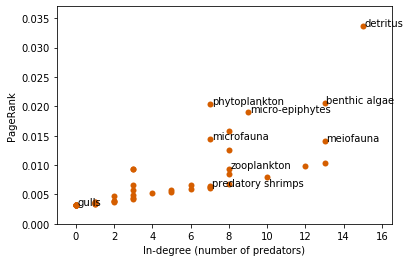

In [23]:
interesting = ['detritus', 'phytoplankton', 'benthic algae', 'micro-epiphytes',
               'microfauna', 'zooplankton', 'predatory shrimps', 'meiofauna',
               'gulls']

pagerank_plot(in_degrees, pagerank, species, annotations=interesting)

Sea sludge ("detritus") is the most important element both by number of
species feeding on it (15) and by PageRank (>0.003). But the second most
important element is *not* benthic algae, which feeds 13 other species, but
rather phytoplankton, which feeds just 7! That's because other *important*
species feed on it. 

Web pages' PageRank works the same way!

So, on the bottom left, we've got sea gulls, who, we can now
confirm, eat everything in the ecosystem. They are the **vacuum machines** of nature! And those vicious *predatory shrimps* support the same number of species as phytoplankton, but they are less essential species, so they end up with a lower foodrank.

Allesina and Pascual go on to model the ecological impact of species extinction, and indeed find that PageRank
predicts ecological importance really well. Interesting article!

PageRank can actually be computed several
different ways. One way is what we did above, with math. Another way is called the
*power method*, and is an **approximation**. This is actually what Google first did, and what made `mapreduce()` famous because PageRank was implemented mapreduce-style. That's because solving *exactly* a system of linear equations with dimension equal to the WWW would be... unfeasible. Would take much too long!

### The Power Method
We know from the [Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem),
that a stochastic matrix has 1 as an eigenvalue, and that this is its *largest* eigenvalue (the corresponding
eigenvector is the dominant or PageRank vector). What this means is that, whenever we
multiply *any* vector $v$ by the transition matrix $M$, the component of $v$ pointing towards the dominant
eigenvector of $M$ stays the same, while *all other components shrink* by a
multiplicative factor. 

The corollary is that ***if we multiply some random
starting vector by $M$ repeatedly, we should eventually get the PageRank
vector since all other components will eventually shrink to zero***!

SciPy makes this very efficient with its sparse matrix module.

`numpy.full(shape, fill_value)` returns a new array with the same `shape` and type as a given array filled with a `fill_value`.

`numpy.allclose()` is used to find if two arrays are element-wise equal within a tolerance.

In [24]:
def power(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * M @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

Let's go back to matrix `Trans`.

Recall that a transition matrix needs to be *column-stochastic*, in which all column entries sum to 1:

In [25]:
rows = 0
for i in range(48):
    if (np.sum((Trans.todense().T)[i]) != 1.):
        rows += 1
print("non stochastic rows: " + str(rows))

non stochastic rows: 8


oopsie..

</br >
<center>
<img src="ipynb.images/oops.jpg" width=100 />
</center>

Let's take a peek..

In [26]:
for i in range(48):
    print(np.sum((Trans.todense().T)[i]))

1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.9999999999999999
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.9999999999999999
1.0


In order to have a **stochastic** matrix, all columns of the transition matrix must sum to 1 (all probabilities need to sum up to 1). This is ***not satisfied*** when a species ***isn't eaten by any others***: that column will consist of all zeroes! 

Above, we have 8 rows that sum to 0. We call these *dangling nodes*. However, replacing columns in that row by arbitrary 1/n **1** so that the row sum is 1 could be an expensive operation if our matrix has large dimensions.

An efficiency is to realise that every row will contribute the same amount to the multiplication of the transition matrix by the current probability vector. That is to say, adding these columns will add a single value to the result of the multiplication of `Trans` by a vector $r$. What value?  1/n times the elements of  $r$ that correspond to a dangling node. This can be expressed as a dot-product of a vector containing 1/n for positions corresponding to dangling nodes, and zero elswhere, with the vector  $r$  for the current iteration. So we can write:

In [27]:
def power2(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    dangling = (1/n) * np.ravel(M.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (M @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

You can try this out manually for a few iterations. Notice that if you start with a
stochastic vector (a vector whose elements all sum to 1), the next vector will
still be a stochastic vector. Thus, the output PageRank from this function will
be a true probability vector, and the values will represent the probability
that we end up at a particular species when following links in the food chain.

Even though `power2` is more correct, it will give the same ranking as `power`.

To verify that these three methods all give the same ranking for the
nodes, `numpy.corrcoef` might be a useful function for this.

`np.corrcoef` gives the **Pearson correlation** coefficient between
all pairs of a list of vectors. This coefficient will be equal to 1 if and only
if two vectors are scalar multiples of each other. Therefore, a correlation
coefficient of 1 is sufficient to show that the above methods produce the same
ranking.

In [28]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Let's double-check:

In [29]:
for i, (s, pr, prp, prp2) in enumerate(zip(species, pagerank, pagerank_power, pagerank_power2)):
    print(i, s, pr, prp, prp2, prp/prp2)

0 fish-eating birds 0.0031250000000000006 0.0031250000000000006 0.008660797633909728 0.36082126982908014
1 atlantic silverside and bay anchovies 0.003862847222222223 0.0038628472222222232 0.01070570512813968 0.3608213729022692
2 macro-epiphytes 0.006600489539708688 0.006600491479577001 0.018292979872656746 0.3608210103288323
3 spot 0.00851913395634404 0.00851913395634404 0.023610385384364208 0.3608214697751511
4 brittle stars 0.0034533420138888895 0.0034533420138888895 0.00957078193783686 0.36082130345447994
5 catfish and stingrays 0.0037890625000000008 0.0037890625000000008 0.010501214378716687 0.36082136440138535
6 predatory polychaetes 0.00671863139327715 0.006718631393277151 0.018620396854801064 0.36082106335691905
7 pinfish 0.005798698933919272 0.0057986989339192715 0.016070829121059813 0.3608213919915582
8 killifish 0.003688530815972223 0.0036885308159722227 0.010222596084373958 0.3608213398561675
9 herbivorous ducks 0.0031250000000000006 0.0031250000000000006 0.00866079763390972

Highest PageRank? *Detritus* or sea-sludge, at 0.03. 2nd highest PageRank? *Phytoplankton*, or *Benthic algae* at 0.02.

</br >
<center>
<img src="ipynb.images/algae.jpg" width=400 />
</center>

<div style="text-align: right; color: gray">15</div>

# Conclusion

This notebook introduced you to **linear algebra** with `NumPy` and `SciPy`, indeed simplified linear algebra by looking at it from the perspective of climbing mountains, introduced eigenvectors and eigenvalues as the most important decomposition of matrices, and showed you how to explore graphs and how to compute important attributes of graphs such as the **PageRank** of each node. 

Doesn't this make you want to explore the facebook graph, or something similar?

This notebook should also give you an idea of the power of `SciPy` and its elegant algorithms. It should make you want to explore `SciPy`, especially before any assignment, to figure out what you can leverage from it. Before you put your trust in software snake venom salesmen that tout the benefits of this package or that package, try out SciPy first!

</br >
<center>
<img src="ipynb.images/wink.jpg" width=100 />
</center>


### References
* [PageRank](https://en.wikipedia.org/wiki/PageRank)
* [MapReduce](https://en.wikipedia.org/wiki/MapReduce)
* [T-SQL MapReduce](https://www.codeproject.com/Articles/627421/T-SQL-MapReduce)

(There is no homework, concentrate on final project)

# ~~Homework 1~~

Analyze another graph using graph theory as we did with food Webs. Find the dominant eigenvector from any perspective you pick (a graph could have mutliple concepts embedded). Write a search engine to find the most important nodes from any perspective of your choice. For example, you could write a search engine on that graph, or just fix the search engine to one  concept.

Don't try to get too complicated. Just copy the methods in this notebook and find another graph to apply them to. Google on the Web, then put it in GML format. Or find one originally in GML format ;-)


# ~~Homework 2~~

Write a python program that takes in any picture and computes an ASCII representation, like the 0s and 1s above with our adjacency matrix (search for `ascii style` in this notebook). Take an ASCII picture of yourself. Put it on top of your HW notebook.


</br >
<center>
<img src="ipynb.images/einstein.jpeg" width=500 />
</center>

</br >
<center>
<img src="ipynb.images/pretty.gif" width=400 />
</center>

#### Hint

If you cannot find an interesting graph, you could create a random one:

C:\Users\liaoz\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


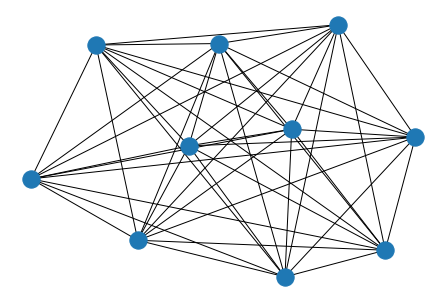

In [30]:
import numpy
import networkx as nx
import matplotlib as pl
%matplotlib inline

#A=numpy.matrix([[1,1],[2,1]])
A=numpy.random.rand(10,10)
G=nx.from_numpy_matrix(A)

nx.draw(G, pos=nx.spring_layout(G))

Note here that our matrix A is very **non-sparse** (i.e. very **dense**). Exact methods to find the dominant eigenvector and thus order nodes by most-pointed-to to least-pointed-to will work, but iterative ones will likley tave a very loooooooooong time to converge. Maybe never if the matrix has many more dimensions than 10.

In [31]:
A

array([[0.94815409, 0.43905594, 0.444568  , 0.20111248, 0.21944955,
        0.23295551, 0.52892702, 0.91057019, 0.82135713, 0.28268294],
       [0.99182803, 0.14561457, 0.00322917, 0.14232766, 0.28116349,
        0.61676482, 0.19389316, 0.84861014, 0.54648188, 0.45298194],
       [0.11518652, 0.91654103, 0.66436312, 0.58350291, 0.61254348,
        0.96088954, 0.55966569, 0.22696745, 0.54258537, 0.07316415],
       [0.31395846, 0.14190802, 0.20155571, 0.91666544, 0.34391036,
        0.54799529, 0.00329175, 0.43750326, 0.58010776, 0.16188212],
       [0.18102285, 0.11963542, 0.17535319, 0.73514841, 0.77895179,
        0.2742824 , 0.94434092, 0.89910362, 0.13481614, 0.6566743 ],
       [0.72555379, 0.66816695, 0.59851489, 0.9150389 , 0.34088774,
        0.60020797, 0.05216562, 0.32956585, 0.0672694 , 0.1764176 ],
       [0.44704543, 0.18651305, 0.7404391 , 0.34996436, 0.33822242,
        0.7222325 , 0.40610379, 0.59497053, 0.85154454, 0.14038718],
       [0.18619047, 0.73223782, 0.9408304

Let's make A a bit sparser:

In [32]:
B = A.copy()
for i in range(9):
    for j in range(9):
        if A[i,j] < 0.5:
            B[i,j] = 0
        else:
            B[i,j] = A[i,j]
B

array([[0.94815409, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.52892702, 0.91057019, 0.82135713, 0.28268294],
       [0.99182803, 0.        , 0.        , 0.        , 0.        ,
        0.61676482, 0.        , 0.84861014, 0.54648188, 0.45298194],
       [0.        , 0.91654103, 0.66436312, 0.58350291, 0.61254348,
        0.96088954, 0.55966569, 0.        , 0.54258537, 0.07316415],
       [0.        , 0.        , 0.        , 0.91666544, 0.        ,
        0.54799529, 0.        , 0.        , 0.58010776, 0.16188212],
       [0.        , 0.        , 0.        , 0.73514841, 0.77895179,
        0.        , 0.94434092, 0.89910362, 0.        , 0.6566743 ],
       [0.72555379, 0.66816695, 0.59851489, 0.9150389 , 0.        ,
        0.60020797, 0.        , 0.        , 0.        , 0.1764176 ],
       [0.        , 0.        , 0.7404391 , 0.        , 0.        ,
        0.7222325 , 0.        , 0.59497053, 0.85154454, 0.14038718],
       [0.        , 0.73223782, 0.9408304

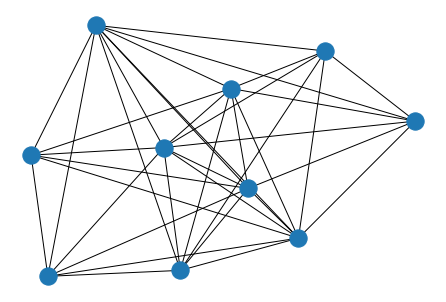

In [33]:
G=nx.from_numpy_matrix(B)
nx.draw(G, pos=nx.spring_layout(G))

Let's make our graph a bit more ***realistic*** by thinning out long-range edges:

In [34]:
C = A.copy()
for i in range(9):
    for j in range(9):
        if A[i,j] < 0.5 or abs(i-j) > 5:
            C[i,j] = 0
        else:
            C[i,j] = A[i,j]
C

array([[0.94815409, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28268294],
       [0.99182803, 0.        , 0.        , 0.        , 0.        ,
        0.61676482, 0.        , 0.        , 0.        , 0.45298194],
       [0.        , 0.91654103, 0.66436312, 0.58350291, 0.61254348,
        0.96088954, 0.55966569, 0.        , 0.        , 0.07316415],
       [0.        , 0.        , 0.        , 0.91666544, 0.        ,
        0.54799529, 0.        , 0.        , 0.58010776, 0.16188212],
       [0.        , 0.        , 0.        , 0.73514841, 0.77895179,
        0.        , 0.94434092, 0.89910362, 0.        , 0.6566743 ],
       [0.72555379, 0.66816695, 0.59851489, 0.9150389 , 0.        ,
        0.60020797, 0.        , 0.        , 0.        , 0.1764176 ],
       [0.        , 0.        , 0.7404391 , 0.        , 0.        ,
        0.7222325 , 0.        , 0.59497053, 0.85154454, 0.14038718],
       [0.        , 0.        , 0.9408304

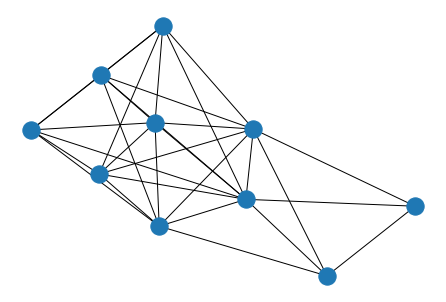

In [35]:
G=nx.from_numpy_matrix(C)
nx.draw(G, pos=nx.spring_layout(G))